In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertModel,BertTokenizer,AdamW,get_linear_schedule_with_warmup
import numpy as np
import warnings
import re
import demoji
import pandas as pd
from textblob import TextBlob



warnings.filterwarnings("ignore")

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [2]:
df = pd.read_csv("C:/nlp_projects/covidtweets/vaccination_all_tweets.csv",delimiter=',',nrows=10000)
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [3]:
df = df[['text']]
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)


def clean_text(text):

    text = str(text).lower()
    text = re.sub(r'<.*?>','', text)    

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'#(\w+)', '', text)

    text = demoji.replace(text, '')

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\@w+|\#', '', text)
    return text




df['text'] = df['text'].apply(clean_text)
df['text'].head(10)

0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2          russian vaccine is created to last 24 ye...
3    facts are immutable senator even when youre no...
4    explain to me again why we need a vaccine bori...
5    does anyone have any useful adviceguidance for...
6    it is a bit sad to claim the fame for success ...
7    there have not been many bright days in 2020 b...
8                 covid vaccine you getting it\n\n    
9     \n\nstates will start getting  monday  says \...
Name: text, dtype: object

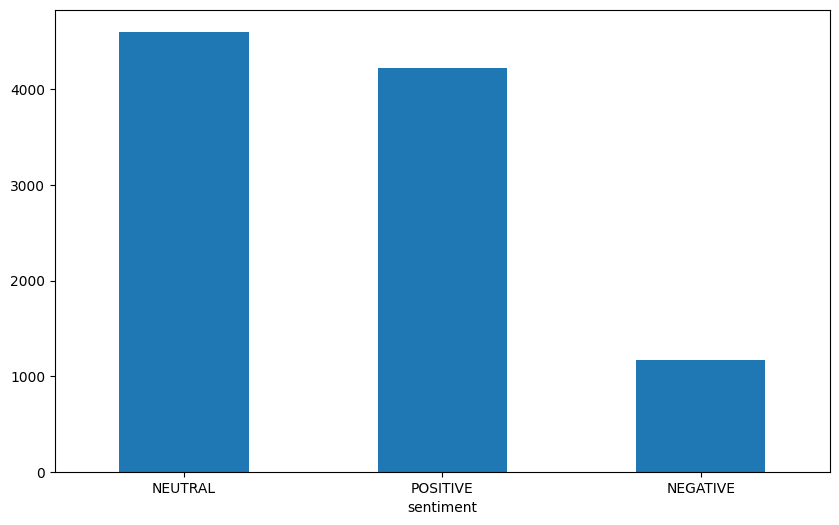

In [4]:


def polarity(text):
    return TextBlob(text).polarity

df['polarity'] = df['text'].apply(polarity)


def sentiment(label):
    if label == 0:
        return "NEUTRAL"
    elif label < 0:
        return "NEGATIVE"
    elif label > 0:
        return "POSITIVE"



df['sentiment'] = df['polarity'].apply(sentiment)

plt.figure(figsize=(10,6))
df['sentiment'].value_counts().plot(kind='bar',rot=0)
plt.show()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


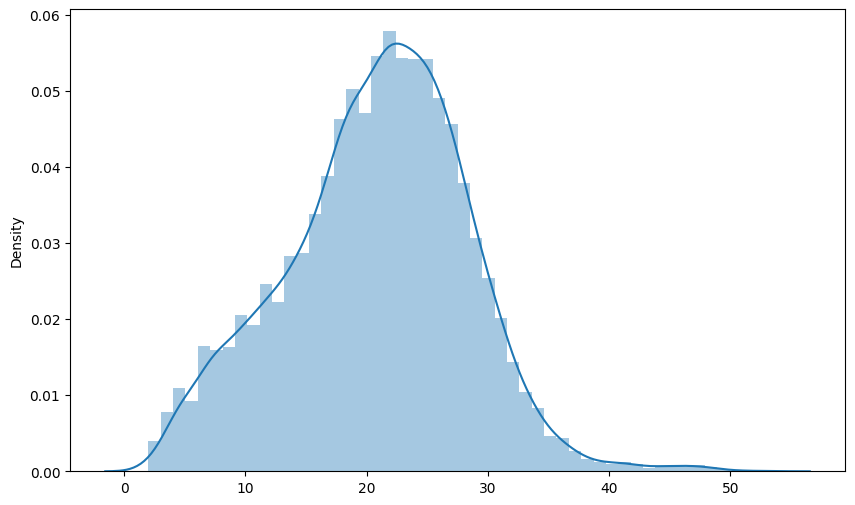

In [5]:

df['sentiment'] = df['sentiment'].map({"NEGATIVE":0,"NEUTRAL":1,"POSITIVE":2})


df.dtypes

df = df[['text','sentiment']]
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)


MODEL_NAME = "bert-base-cased"

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME,do_lower_case=True)


sample_tokens = []
for txt in df['text']:
    tokens = tokenizer.encode(txt,max_length=512)
    sample_tokens.append(len(tokens))


plt.figure(figsize=(10,6))
sns.distplot(sample_tokens)
plt.show()


In [7]:

MAX_LEN = 50


class custom_dataset(Dataset):
    def __init__(self,text,targets,max_len,tokenizer):
        self.text = text
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.text)
    
    def __getitem__(self,idx):
        text = str(self.text[idx])
        target = self.targets[idx]
        
        encoder = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_token_type_ids=False,
            return_tensors='pt',
            )
        
        return {
            "text":text,
            "input_ids":encoder['input_ids'].flatten(),
            "attention_mask":encoder['attention_mask'].flatten(),
            "targets":torch.tensor(target,dtype=torch.long)
            }




from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=.20,random_state=42)
df_val,df_test = train_test_split(df_test, test_size=.50,random_state=42)


BATCH_SIZE = 14

def get_dataloader(df,tokenizer,batch_size,max_len):
    ds = custom_dataset(
        text = df['text'].to_numpy(),
        targets = df['sentiment'].to_numpy(),
        max_len=max_len,
        tokenizer=tokenizer
        )
    return DataLoader(
        ds,
        num_workers=0,
        batch_size=batch_size
        )

train_dataloader = get_dataloader(df_train, tokenizer, BATCH_SIZE, MAX_LEN)
test_dataloader = get_dataloader(df_test,tokenizer,BATCH_SIZE,MAX_LEN)
val_dataloader = get_dataloader(df_val,tokenizer,BATCH_SIZE,MAX_LEN)

data = next(iter(train_dataloader))
print(data.keys())

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])


In [8]:

class Bert_Classifier(nn.Module):
    def __init__(self, n_classes=3):
        super(Bert_Classifier,self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768,3)
    

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        pooled_output = outputs.pooler_output
        output = self.drop(pooled_output)
        return self.out(output)



model = Bert_Classifier(3)
model.to(device)


Bert_Classifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [9]:
num_epochs = 4
total_steps = len(train_dataloader) * num_epochs


optimizer = AdamW(model.parameters(),lr=2e-5)
loss_fn = nn.CrossEntropyLoss().to(device)
scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)




def training_epoch(model,dataloader,loss_fn,optimizer,device,scheduler,n_examples):
    model.train()
    losses = []
    predictions = 0
    for d in dataloader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        targets = d['targets'].to(device)
        
        outputs = model(
            attention_mask=attention_mask,
            input_ids=input_ids
            )
        _,preds = torch.max(outputs,dim=1)
        loss = loss_fn(outputs,targets)
        predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return (predictions.double() / n_examples,np.mean(losses))



def eval_model(model,dataloader,loss_fn,device,n_examples):
    model.eval()
    losses = []
    predictions = 0
    
    
    with torch.no_grad():
        for d in dataloader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)
            
            outputs = model(
                attention_mask=attention_mask,
                input_ids=input_ids
                )
            
            _,preds = torch.max(outputs,dim=1)
            loss = loss_fn(outputs,targets)
            
            predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
        return (predictions.double() / n_examples,np.mean(losses))






for epoch in range(num_epochs):
    print(f'{epoch+1}/{num_epochs}')
    
    train_acc,train_loss = training_epoch(
        model,
        train_dataloader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
        )
    
    
    val_acc,val_loss = eval_model(model, val_dataloader, loss_fn, device, len(df_val))
    print(f" Training accuracy {train_acc*100:.2f}%; -Val Accuracy-- {val_acc*100:.2f}%")
    print(f"training loss {train_loss*100:.2f}%; --val loss-- {val_loss*100:.2f}%")



1/4
 Training accuracy 76.14%; -Val Accuracy-- 91.46%
training loss 58.91%; --val loss-- 30.35%
2/4
 Training accuracy 93.41%; -Val Accuracy-- 93.33%
training loss 22.74%; --val loss-- 29.19%
3/4
 Training accuracy 96.86%; -Val Accuracy-- 94.48%
training loss 13.07%; --val loss-- 28.52%
4/4
 Training accuracy 98.15%; -Val Accuracy-- 94.27%
training loss 8.38%; --val loss-- 27.23%


In [10]:
test_acc, _ = eval_model(
  model,
  test_dataloader,
  loss_fn,
  device,
  len(df_test)
)

print(f'Testing Accuracy : {test_acc.item() *100 :.2f}%')


Testing Accuracy : 93.34%


In [12]:


from sklearn.metrics import classification_report,confusion_matrix


def get_predictions(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for d in dataloader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)
            
            outputs = model(
                attention_mask=attention_mask,
                input_ids=input_ids
            )
            
            _, preds = torch.max(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    
    return all_labels, all_preds





true_labels, predicted_labels = get_predictions(model, test_dataloader, device)

clf_rpt = classification_report(true_labels,predicted_labels)
print(f'Classification Report: {clf_rpt}')

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.76      0.81       127
           1       0.96      0.95      0.96       434
           2       0.92      0.97      0.94       400

    accuracy                           0.93       961
   macro avg       0.92      0.89      0.90       961
weighted avg       0.93      0.93      0.93       961



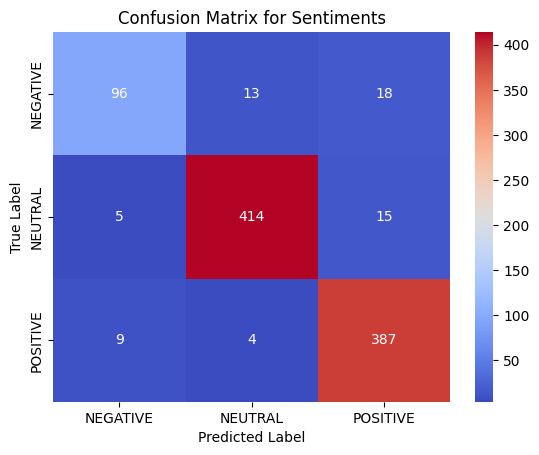

In [13]:
def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",xticklabels=['NEGATIVE','NEUTRAL','POSITIVE'],yticklabels=['NEGATIVE','NEUTRAL','POSITIVE'])
    plt.title("Confusion Matrix for Sentiments")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


plot_confusion_matrix(true_labels, predicted_labels)